In [2]:
import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import glasbey
from matplotlib.colors import ListedColormap
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import matplotlib.pyplot as plt
%matplotlib inline

# Ecological Marine Units

Downloaded "EMU netCDF" file from https://esri.maps.arcgis.com/home/group.html?id=6c78a5125d3244f38d1bc732ef0ee743#overview

In [3]:
fp = '../../data/province_shapes/emu_netCDF/emu_v5_20200914.nc'
nc = netCDF4.Dataset(fp)

output_dir = "output_final/dbscan/interpretation/"

In [4]:
lat = nc.variables["latitude"][:]
lon = nc.variables["longitude"][:]
depth = nc.variables["depth"][:]

temp = nc.variables["temp"][:]
salinity = nc.variables["salinity"][:]
appO2ut = nc.variables["appO2ut"][:]
dissO2 = nc.variables["dissO2"][:]
nitrate = nc.variables["nitrate"][:]
percO2sat = nc.variables["percO2sat"][:]
phosphate = nc.variables["phosphate"][:]
silicate = nc.variables["silicate"][:]
srtm30 = nc.variables["srtm30"][:]

emu = nc.variables["name_emu"][:]

In [5]:
# # my regions
# nc = netCDF4.Dataset("regions.nc")

# lat = nc.variables["LATITUDE"][:]
# lon = nc.variables["LONGITUDE"][:]
# depth = nc.variables["LEV_M"][:]

# emu = nc.variables["label"][:]

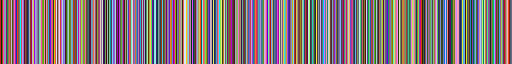

In [6]:
# define color map and ranges
unique_labels = np.sort(np.unique(emu.data))
upper = unique_labels.max() if not np.isnan(unique_labels.max()) else unique_labels[-2]
lower = unique_labels[0]

colors = glasbey.create_palette(palette_size=abs(upper-lower))
cm = ListedColormap(colors)  

vmin = emu.min() if emu.min() >= 0 else unique_labels[1]
vmax = emu.max()

cm

In [7]:
# plot global regions
plt.rcParams["figure.figsize"] = (10, 5)

def plot_emus_over_depth(depth_level):
    plt.imshow(emu[depth_level,:,:], cmap=cm, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.gca().invert_yaxis()

depth_levels = np.array((range(len(depth))))
interact(plot_emus_over_depth, depth_level=widgets.IntSlider(value=depth_levels.max(), min=depth_levels.min(), max=depth_levels.max(), step=1))

plt.show()

interactive(children=(IntSlider(value=101, description='depth_level', max=101), Output()), _dom_classes=('widg…

## North Atlantic 
(esp. deep waters)

In [8]:
# defining out area of interest
lat_min = 0
lat_max = 70

lon_min = -77
lon_max = 30

# latitude lower and upper index
lat_min_p = np.argmin( np.abs( lat - lat_min ) )
lat_max_p = np.argmin( np.abs( lat - lat_max ) ) 

# longitude lower and upper index
lon_min_p = np.argmin( np.abs( lon - lon_min ) )
lon_max_p = np.argmin( np.abs( lon - lon_max ) )  

our_emu = emu[:, lat_min_p:lat_max_p , lon_min_p:lon_max_p]

# plot settings
factor = 12
mymap = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max)
plt.rcParams["figure.figsize"] = ((lon_max - lon_min)/factor, (lat_max - lat_min)/factor)

# plot
def plot_emus_over_depth(depth_level):
    t = our_emu[depth_level,:,:]
    mymap.imshow(t, cmap=cm, vmin=vmin, vmax=vmax)
    mymap.drawcoastlines(linewidth=0.5)
    mymap.fillcontinents()
    mymap.drawparallels(np.arange(int(lat_min),int(lat_max), 10),labels=[1,0,0,0])
    mymap.drawmeridians(np.arange(int(lon_min),int(lon_max), 10),labels=[0,0,0,1])
    plt.tight_layout()
    # plt.savefig(output_dir + "emu_surface.png")

depth_levels = np.array((range(len(depth))))
interact(plot_emus_over_depth, depth_level=widgets.IntSlider(value=depth_levels.max(), min=depth_levels.min(), max=depth_levels.max(), step=1))

plt.show()

interactive(children=(IntSlider(value=101, description='depth_level', max=101), Output()), _dom_classes=('widg…

In [9]:
print(f"Our Atlantic deep water regions are equivalent to depth levels 0 until {np.argwhere(depth==-3000)[0][0]} of the EMU regions.")

Our Atlantic deep water regions are equivalent to depth levels 0 until 25 of the EMU regions.


In [10]:
depth[41]

-1700

## Labrador Sea

In [11]:
lon_min = -77
lon_max = -30 # 70

lat_min = 50
lat_max = 90

# latitude lower and upper index
lat_min_p = np.argmin( np.abs( lat - lat_min ) )
lat_max_p = np.argmin( np.abs( lat - lat_max ) ) 

# longitude lower and upper index
lon_min_p = np.argmin( np.abs( lon - lon_min ) )
lon_max_p = np.argmin( np.abs( lon - lon_max ) )  

lab_emu = emu[:, lat_min_p:lat_max_p , lon_min_p:lon_max_p]

factor = 12
plt.rcParams["figure.figsize"] = ((lon_max - lon_min)/factor, (lat_max - lat_min)/factor)
# mymap = Basemap(llcrnrlon=lon_min, llcrnrlat=lat_min, urcrnrlon=lon_max, urcrnrlat=lat_max)
def plot_emus_over_depth(depth_level):
    plt.imshow(lab_emu[depth_level,:,:], cmap=cm, vmin=vmin, vmax=vmax)
    # plt.colorbar()
    # mymap.drawcoastlines(linewidth=0.5)
    # mymap.fillcontinents()
    # mymap.drawparallels(np.arange(int(lat_min),int(lat_max), 10),labels=[1,0,0,0])
    # mymap.drawmeridians(np.arange(int(lon_min),int(lon_max), 10),labels=[0,0,0,1])
    
    plt.gca().invert_yaxis()

# plt.rcParams["figure.figsize"] = (abs((lon_max_p-lon_min_p)/12), abs((lat_max_p-lat_min_p)/12))
depth_levels = np.array((range(len(depth))))
interact(plot_emus_over_depth, depth_level=widgets.IntSlider(value=depth_levels.max(), min=depth_levels.min(), max=depth_levels.max(), step=1))

plt.show()

interactive(children=(IntSlider(value=101, description='depth_level', max=101), Output()), _dom_classes=('widg…

In [12]:
depth[47]

-1400

## Mediterranean Sea

In [13]:
lon_min = -6
lon_max = 30

lat_min = 30
lat_max = 48

# latitude lower and upper index
lat_min_p = np.argmin( np.abs( lat - lat_min ) )
lat_max_p = np.argmin( np.abs( lat - lat_max ) ) 

# longitude lower and upper index
lon_min_p = np.argmin( np.abs( lon - lon_min ) )
lon_max_p = np.argmin( np.abs( lon - lon_max ) )  

# define Mediterranean area
medi_emu = emu[:, lat_min_p:lat_max_p , lon_min_p:lon_max_p]
for loni in range(medi_emu.shape[2]):
    for lati in range(medi_emu.shape[1]):
        if (lati > 50 and loni < 35) or (lati > 40 and loni > 130):
            medi_emu.mask[:, lati, loni] = True 
            medi_emu.data[:, lati, loni] = -9999
medi_labels = np.delete(np.sort(np.unique(medi_emu.data)), 0)


def plot_emus_over_depth(depth_level):
    plt.imshow(medi_emu[depth_level,:,:], cmap=cm, vmin=vmin, vmax=vmax)
    plt.colorbar()
    plt.gca().invert_yaxis()

plt.rcParams["figure.figsize"] = (abs((lon_max_p-lon_min_p)/12), abs((lat_max_p-lat_min_p)/12))
depth_levels = np.array((range(len(depth))))
interact(plot_emus_over_depth, depth_level=widgets.IntSlider(value=depth_levels.max(), min=depth_levels.min(), max=depth_levels.max(), step=1))

plt.show()

interactive(children=(IntSlider(value=101, description='depth_level', max=101), Output()), _dom_classes=('widg…

In [14]:
print(f"There are {len(medi_labels)} different clusters: {list(medi_labels)}.")

There are 5 different clusters: [18, 26, 27, 29, 30].


In [15]:
print(f"Cluster vanish below {depth[80]} m.")

Cluster vanish below -125 m.
